# I.	Importation des bibliothèques de travail

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# II.	Description du fichier de données « fromages.csv »

In [2]:
data = pd.read_csv("fromages.csv",sep = ';',index_col=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, CarredelEst to Yaourtlaitent.nat.
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     29 non-null     int64  
 1   sodium       29 non-null     float64
 2   calcium      29 non-null     float64
 3   lipides      29 non-null     float64
 4   retinol      29 non-null     float64
 5   folates      29 non-null     float64
 6   proteines    29 non-null     float64
 7   cholesterol  29 non-null     int64  
 8   magnesium    29 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 2.3+ KB


In [4]:
data.shape

(29, 9)

In [5]:
print ('les 5 premières lignes')
print (data.head())

les 5 premières lignes
             calories  sodium  calcium  lipides  retinol  folates  proteines  \
Fromages                                                                       
CarredelEst       314   353.5     72.6     26.3     51.6     30.3       21.0   
Babybel           314   238.0    209.8     25.1     63.7      6.4       22.6   
Beaufort          401   112.0    259.4     33.3     54.9      1.2       26.6   
Bleu              342   336.0    211.1     28.9     37.1     27.5       20.2   
Camembert         264   314.0    215.9     19.5    103.0     36.4       23.4   

             cholesterol  magnesium  
Fromages                             
CarredelEst           70         20  
Babybel               70         27  
Beaufort             120         41  
Bleu                  90         27  
Camembert             60         20  


In [6]:
print ('afficher les 5 derniers lignes')
print (data.tail())

afficher les 5 derniers lignes
                    calories  sodium  calcium  lipides  retinol  folates  \
Fromages                                                                   
Rocquefort               370   432.0    162.0     31.2     83.5     13.3   
SaintPaulin              298   205.0    261.0     23.3     60.4      6.7   
Tome                     321   252.0    125.5     27.3     62.3      6.2   
Vacherin                 321   140.0    218.0     29.3     49.2      3.7   
Yaourtlaitent.nat.        70    91.0    215.7      3.4     42.9      2.9   

                    proteines  cholesterol  magnesium  
Fromages                                               
Rocquefort               18.7          100         25  
SaintPaulin              23.3           70         26  
Tome                     21.8           80         20  
Vacherin                 17.6           80         30  
Yaourtlaitent.nat.        4.1           13         14  


In [7]:
fromage_sd = preprocessing.scale(data)

# III Application des algorithmes CAH & k-mean

1- CAH 

In [8]:
z = linkage(fromage_sd,method='ward',metric='euclidean')

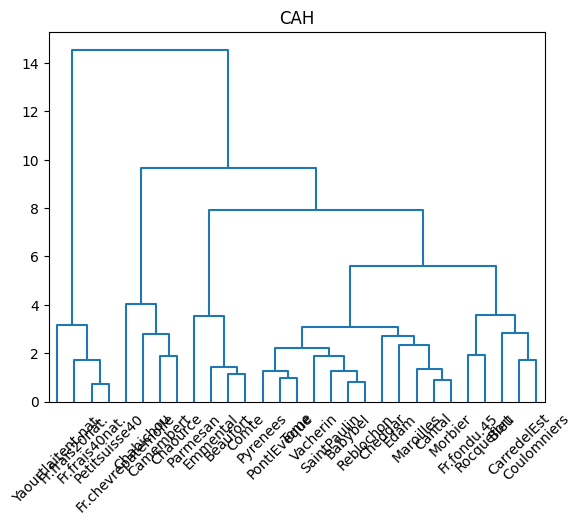

In [9]:
dendrogram(z,labels=data.index,orientation='top',color_threshold=0)
plt.title("CAH")
plt.show()

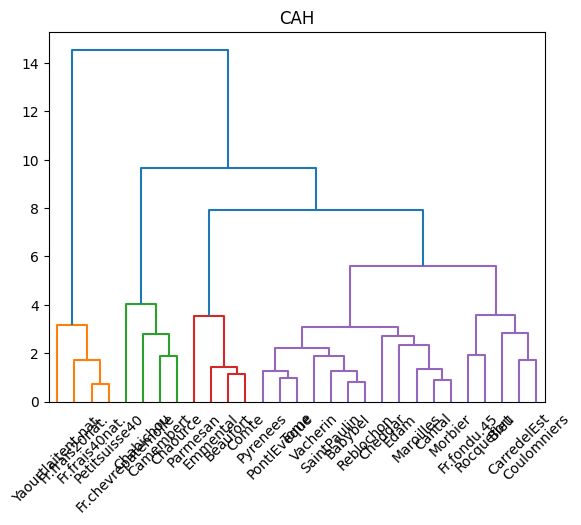

In [10]:
dendrogram(z,labels=data.index,orientation='top',color_threshold=7)
plt.title("CAH")
plt.show()

2- K-mean

In [11]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(fromage_sd)

KMeans(n_clusters=4)

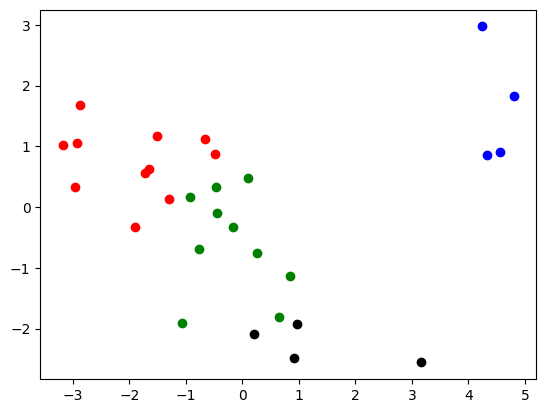

In [12]:
from sklearn.decomposition import PCA
acp= PCA(n_components=2).fit_transform (fromage_sd)
for couleur,k in zip(['red','blue','black','green'],[0,1,2,3]):
    plt.scatter (acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

In [13]:
groupes_cah_4 = fcluster(z,t=7,criterion='distance')
id_groupe_tri = np.argsort(groupes_cah_4)
print ("regroupement avec CAH:")
group_class_CAH=data.groupby(groupes_cah_4) 
nbr_indv_per_Class_CAH = group_class_CAH.size() 
print (nbr_indv_per_Class_CAH)
print ("regroupement avec Kmeans")
group_class_kmeans=data.groupby(kmeans.labels_) 
nbr_indv_per_Class_kmeans = group_class_kmeans.size() 
print (nbr_indv_per_Class_kmeans)

regroupement avec CAH:
1     4
2     4
3     4
4    17
dtype: int64
regroupement avec Kmeans
0    11
1     4
2     4
3    10
dtype: int64


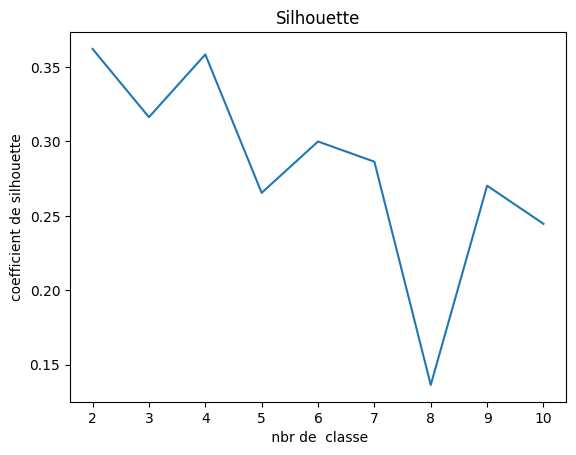

In [14]:
from sklearn import metrics
res= np.arange(9,dtype="double")
for k in np.arange(9):
    km=KMeans(n_clusters=k+2)
    km.fit(fromage_sd)
    res[k]= metrics.silhouette_score(fromage_sd,km.labels_)
plt.plot(np.arange (2,11,1),res)
plt.title("Silhouette")
plt.xlabel(" nbr de  classe")
plt.ylabel("coefficient de silhouette")
plt.show()


# code à completer

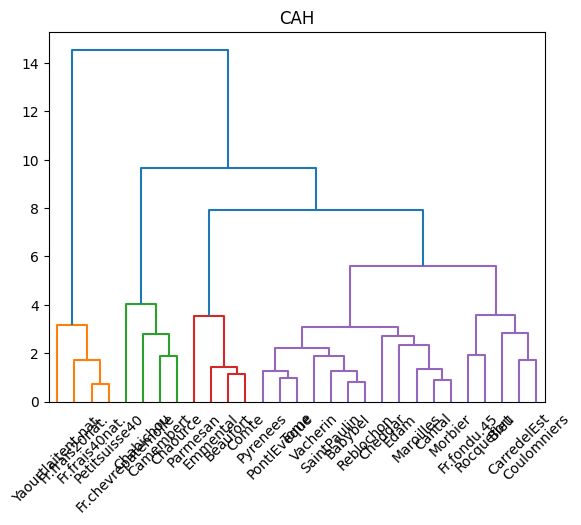

In [15]:
import matplotlib.pyplot as plt

dendrogram(z, labels=data.index, orientation='top', color_threshold=7)
plt.title("CAH")
plt.show()

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(fromage_sd)

KMeans(n_clusters=3)

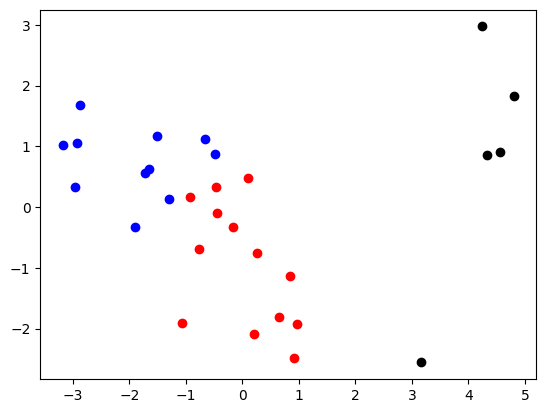

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

acp = PCA(n_components=2).fit_transform(fromage_sd)

for couleur, k in zip(['red', 'blue', 'black', 'green'], [0, 1, 2, 3]):
    plt.scatter(acp[kmeans.labels_ == k, 0], acp[kmeans.labels_ == k, 1], c=couleur)

plt.show()